In [446]:
import numpy as np
import scipy.io
import scipy
import scipy.special
import matplotlib.pyplot as plt

In [447]:
np.random.seed(8)

In [448]:
data = scipy.io.loadmat("data/data.mat")

In [449]:
train = data['X']
label = data['y']
test = data['X_test']

In [450]:
from sklearn import model_selection

In [451]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(train, label, test_size = 0.2)

In [452]:
from sklearn.preprocessing import StandardScaler

In [453]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [454]:
X_valid_scaled = scaler.transform(X_valid)

In [455]:
test_scaled = scaler.transform(test)

In [456]:
X_train_final = np.concatenate((X_train_scaled, np.ones((X_train_scaled.shape[0], 1))), axis = 1)

In [457]:
X_valid_final = np.concatenate((X_valid_scaled, np.ones((X_valid_scaled.shape[0], 1))), axis = 1)

In [458]:
test_final = np.concatenate((test_scaled, np.ones((test_scaled.shape[0], 1))), axis = 1)

In [459]:
def cost(X, w, y, reg):
    return -np.sum(y * np.log(scipy.special.expit(X @ w) + 1e-16) + (1 - y) * np.log(1 - scipy.special.expit(X @ w) + 1e-16)) + reg * (np.linalg.norm(w) ** 2)

In [489]:
reg = 0.1
alpha = 0.005
w = np.zeros((13, 1))

In [490]:
costs = []
for i in range(200):
    costs.append(cost(X_train_final, w, y_train, reg))
    w = w - alpha * (reg * w - X_train_final.T @ (y_train - scipy.special.expit(X_train_final @ w)))

part 2


Text(0, 0.5, 'training cost')

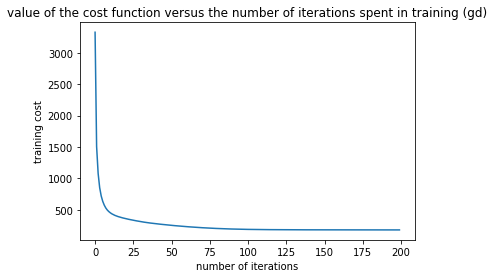

In [491]:
print('part 2')
plt.plot(np.arange(200), costs)
plt.title('value of the cost function versus the number of iterations spent in training (gd)')
plt.xlabel('number of iterations')
plt.ylabel('training cost')

In [492]:
def accuracy(X, y, w):
    c = 0
    s = scipy.special.expit(X @ w)
    for i in range(len(y)):
        if s[i][0] >= 0.5:
            if y[i][0] == 1:
                c += 1
        else:
            if y[i][0] == 0:
                c += 1
    return c / len(y)

In [493]:
accuracy(X_train_final, y_train, w)

0.9945833333333334

In [494]:
accuracy(X_valid_final, y_valid, w)

0.995

In [466]:
reg = 0.01
alpha = 0.001
w = np.random.random_sample((13, 1))

In [467]:
costs = []
idx = np.arange(X_train_final.shape[0])
np.random.shuffle(idx)
for k in range(4):
    for i in range(len(idx)):
        costs.append(cost(X_train_final, w, y_train, reg))
        w = w - alpha * (reg * w - (y_train[idx[i]] - scipy.special.expit(X_train_final[idx[i]].reshape(1, 13) @ w)) * X_train_final[idx[i]].reshape(13, 1))
    idx = np.arange(X_train_final.shape[0])
    np.random.shuffle(idx)

part 4


Text(0, 0.5, 'training cost')

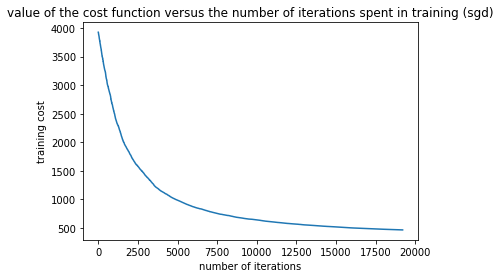

In [468]:
print('part 4')
plt.plot(np.arange(4 * len(idx)), costs)
plt.title('value of the cost function versus the number of iterations spent in training (sgd)')
plt.xlabel('number of iterations')
plt.ylabel('training cost')

In [469]:
accuracy(X_train_final, y_train, w)

0.9854166666666667

In [470]:
accuracy(X_valid_final, y_valid, w)

0.9816666666666667

Batch Gradient Descent converges more quickly and obtains a lower value of the cost function.

In [479]:
reg = 0.01
init_alpha = 1
w = np.random.random_sample((13, 1))

In [480]:
costs = []
idx = np.arange(X_train_final.shape[0])
np.random.shuffle(idx)
for k in range(4):
    for i in range(len(idx)):
        alpha = init_alpha/(len(idx)*k + i + 1)
        costs.append(cost(X_train_final, w, y_train, reg))
        w = w - alpha * (reg * w - (y_train[idx[i]] - scipy.special.expit(X_train_final[idx[i]].reshape(1, 13) @ w)) * X_train_final[idx[i]].reshape(13, 1))
 
    idx = np.arange(X_train_final.shape[0])
    np.random.shuffle(idx)

part 5


Text(0, 0.5, 'training cost')

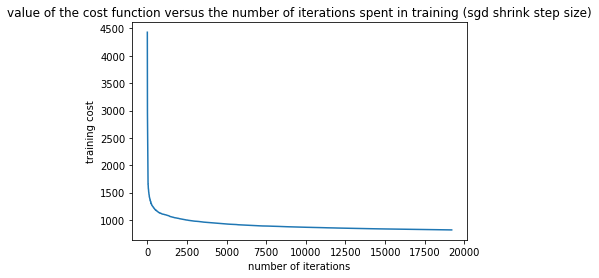

In [481]:
print('part 5')
plt.plot(np.arange(4 * len(idx)), costs)
plt.title('value of the cost function versus the number of iterations spent in training (sgd shrink step size)')
plt.xlabel('number of iterations')
plt.ylabel('training cost')

In [482]:
accuracy(X_train_final, y_train, w)

0.9397916666666667

In [483]:
accuracy(X_valid_final, y_valid, w)

0.9308333333333333

The convergence is much faster than that of my previous SGD code.

In [495]:
reg = 0.1
alpha = 0.005
w = np.zeros((13, 1))

In [496]:
for i in range(200):
    w = w - alpha * (reg * w - X_train_final.T @ (y_train - scipy.special.expit(X_train_final @ w)))

In [497]:
s = scipy.special.expit(test_final @ w)
pred = []
for i in range(len(test_final)):
        if s[i][0] >= 0.5:
            pred += [1]
        else:
            pred += [0]

In [498]:
import pandas as pd

In [499]:
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')

In [501]:
results_to_csv(np.array(pred))

Kaggle Username: Yao Liang, Score: 0.99496. I used Batch Gradient Descent with 200 iterations with carefully chosed hyperparameters.